### The Sparks Foundation GRIP (Batch-SEP-2021)

**NAME : SHALINI**

**TASK 2**

**K-Means Clustering
To Explore Unsupervised Machine Learning-**

**From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.**

**The notebook will walk through some of the basics of K-Means Clustering.** 

In [17]:
# Importing the Required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [49]:
iris_df = pd.read_csv("Iris.csv", index_col = 0)

In [50]:
print("Let's see a part of the whole dataset - \n")
iris_df.head() 

Let's see a part of the whole dataset - 



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Load the iris dataset
#iris = datasets.load_iris()
#iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
#iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
# to get the summary of dataset
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [55]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [56]:
#Now i am trying to find duplicate data in the dataset
duplicate = iris_df.duplicated()
sum(duplicate)

3

**Found duplicated values in iris dataset removing them using drop_duplicates()**

In [57]:
df = iris_df.drop_duplicates()

In [58]:
#checking whether duplicated values removed or not
duplicate = df.duplicated()
sum(duplicate)

0

In [59]:
#Now i will try to find out if there is any null values in the dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [60]:
#Now i will try to find out if there is any NA values in the dataset
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [61]:
# renaming the column names to do further analysis
#df1 = df.rename(columns={'sepal length (cm)':'sepal_length','sepal width (cm)':'sepal_width','petal length (cm)':'petal_length','petal width (cm)':'petal_width'})


In [64]:
df1.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x2364bd62430>,
 'caps': [<matplotlib.lines.Line2D at 0x2364bd62b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2364bd62880>],
 'medians': [<matplotlib.lines.Line2D at 0x2364acf3d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2364acf3940>],
 'means': []}

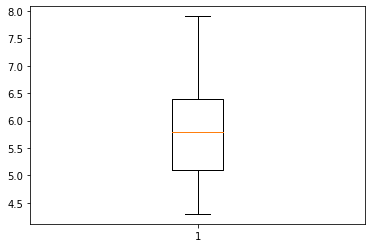

In [72]:
#Now i will try to plot the data to find out the outliers and will try to winsorize them
plt.boxplot(df1['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2364ac4aee0>,
 'caps': [<matplotlib.lines.Line2D at 0x2364ac4af10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2364801f2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2364ac4a400>],
 'fliers': [<matplotlib.lines.Line2D at 0x2364ab2c3d0>],
 'means': []}

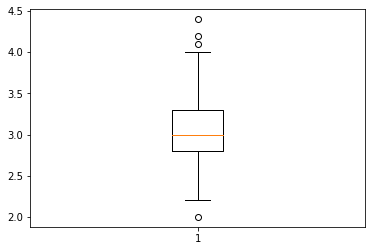

In [73]:
plt.boxplot(df1['SepalWidthCm']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x2364bd065b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2364bd06ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2364bd06220>],
 'medians': [<matplotlib.lines.Line2D at 0x2364bd3e370>],
 'fliers': [<matplotlib.lines.Line2D at 0x2364bd3e6d0>],
 'means': []}

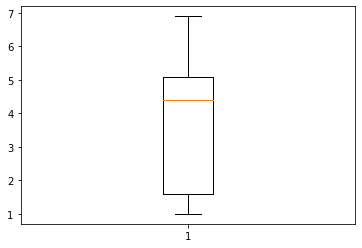

In [74]:
plt.boxplot(df1['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2364acfe580>,
 'caps': [<matplotlib.lines.Line2D at 0x2364acfeca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2364acfe1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2364ac45400>],
 'fliers': [<matplotlib.lines.Line2D at 0x2364ac45790>],
 'means': []}

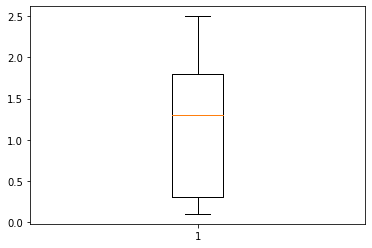

In [75]:
plt.boxplot(df1['PetalWidthCm']) 

In [76]:
# found outliers in sepal_width will remove using winsorization

# Detection of outliers (find limits for salary based on IQR)
IQR = df1['SepalWidthCm'].quantile(0.75) - df1['SepalWidthCm'].quantile(0.25)
lower_limit = df1['SepalWidthCm'].quantile(0.25) - (IQR * 1.5)
upper_limit = df1['SepalWidthCm'].quantile(0.75) + (IQR * 1.5)

from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['SepalWidthCm'])
df_t = winsor.fit_transform(df1[['SepalWidthCm']])


C:\Users\SHALINI BHARGAV\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


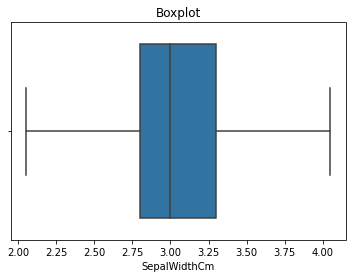

In [77]:
# lets see boxplot
sns.boxplot(df_t.SepalWidthCm);plt.title('Boxplot');plt.show()

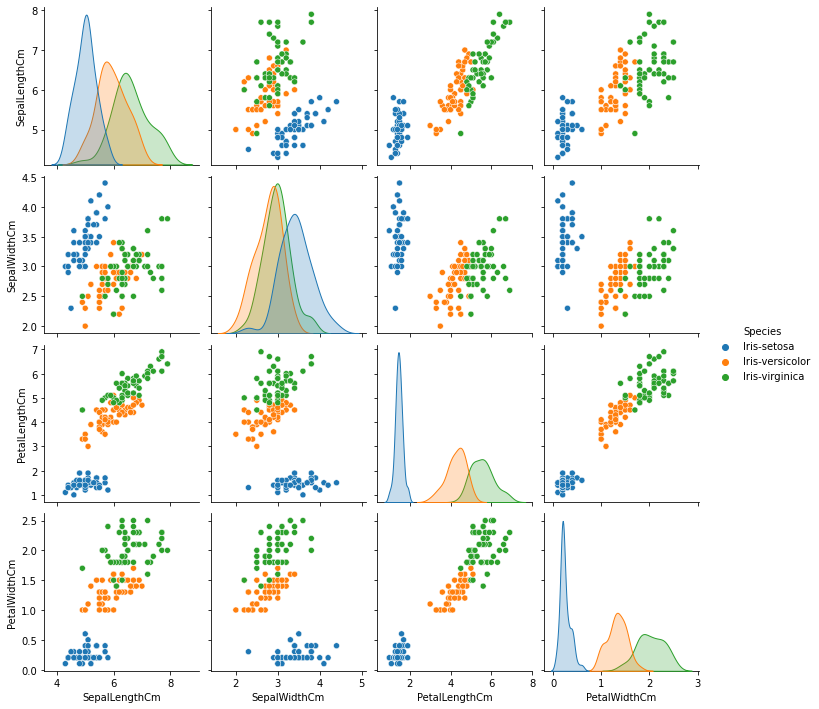

In [78]:
# Plotting the pair plot
sns.pairplot(df1, hue = 'Species')

<AxesSubplot:>

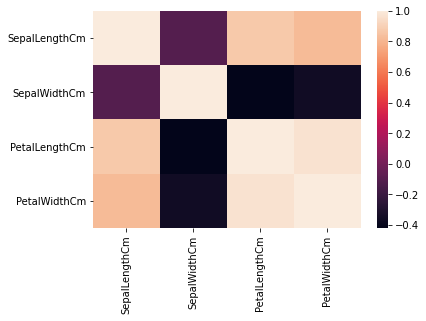

In [79]:
# correlation matrix
sns.heatmap(df1.corr())

(array([ 9., 21., 14., 27., 15., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

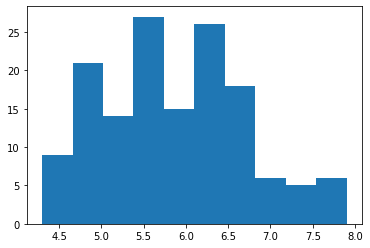

In [80]:
plt.hist(df1.SepalLengthCm)

(array([ 4.,  7., 21., 24., 36., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

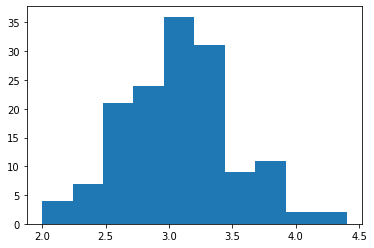

In [81]:
plt.hist(df1.SepalWidthCm)

(array([35., 13.,  0.,  3.,  8., 26., 28., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

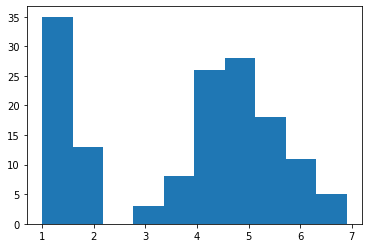

In [82]:
plt.hist(df1.PetalLengthCm)

(array([39.,  8.,  1.,  7.,  8., 33.,  6., 22.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

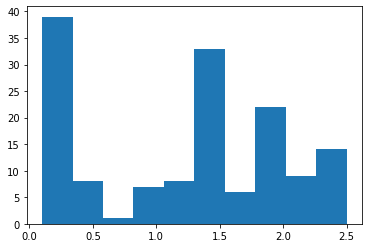

In [83]:
plt.hist(df1.PetalWidthCm)

Observations made -

Petal length is highly related to petal width.
Sepal lenth is not related sepal width.

In [37]:
### Normalization function - Custom Function
# Range converts to: 0 to 1
def norm_func(i):
	x = (i-i.min())	/(i.max()-i.min())
	return(x)

In [38]:
df_norm = norm_func(df1)

In [39]:
df_norm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,0.428784,0.441555,0.465931,0.456096
std,0.230792,0.181809,0.299626,0.317759
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.559322,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [40]:
# Finding the optimum number of clusters for k-means classification

x = df1.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

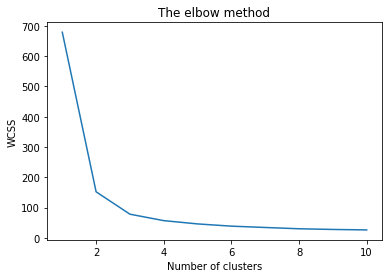

In [41]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.**

**Selecting 3 clusters from the above scree plot which is the optimum number of clusters as at point 3rd point(over here 4) is having good elbow**

In [42]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

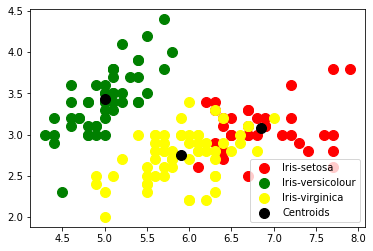

In [43]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

**Based on scree plot or elbow curve bend of elbow i took 3 cluster here**